# Excercise 3: Deep Learning

## Task 1: Count number of pictures in Apple and Pears
🐚 Execute shell script "count_files.sh"

## Task 2: --

## Task 3: Read in pictures in data structure

In [5]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

In [7]:
apple_folder = '/home/juliusdoebelt/documents/repos/school/Advanced_Analytics/Excercise3/Apple'
pears_fodler = '/home/juliusdoebelt/documents/repos/school/Advanced_Analytics/Excercise3/Pears'

apple_data = []
pears_data = []

for file in os.listdir(apple_folder):
    apple_data.append(np.array(Image.open(apple_folder + '/' + file).resize((128, 128))))

for file in os.listdir(pears_fodler):
    pears_data.append(np.array(Image.open(pears_fodler + '/' + file).resize((128, 128))))

In [13]:
print(f'number of files in Apple folder: {len(apple_data)}')
print(f'number of files in Pears folder: {len(pears_data)}')
# Our shell script gave us a file more

number of files in Apple folder: 223
number of files in Pears folder: 223


## Task 4: Display images from each class

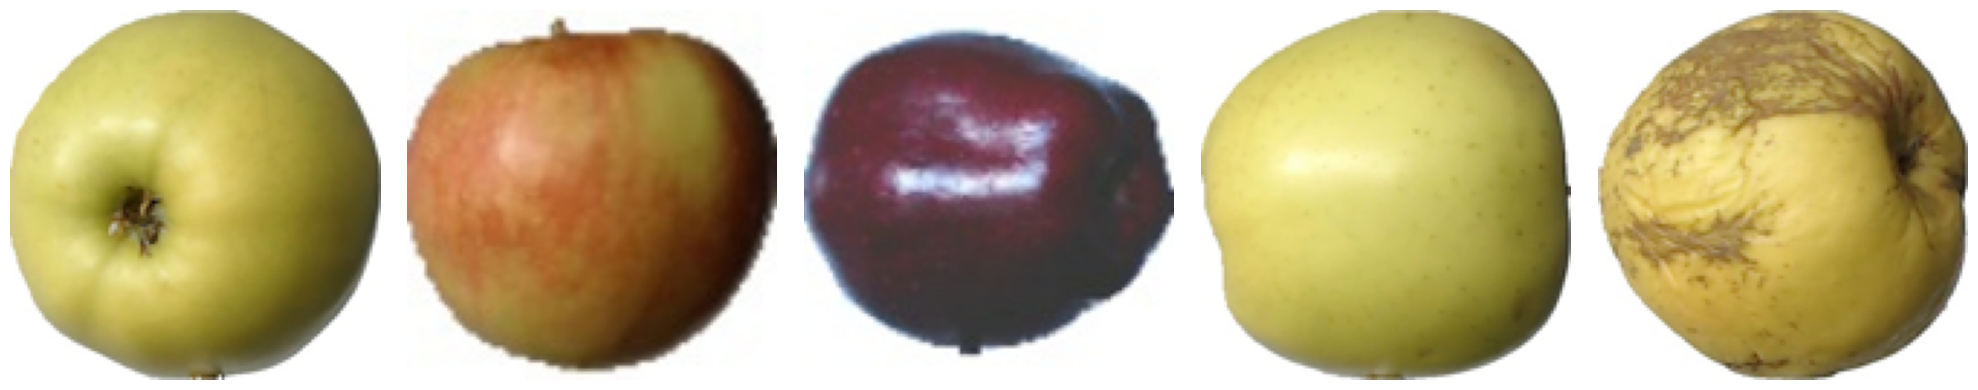

In [16]:
# plotting some pics 
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for i in range(5):
    # Display the image in the corresponding subplot
    axes[i].imshow(apple_data[i])
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

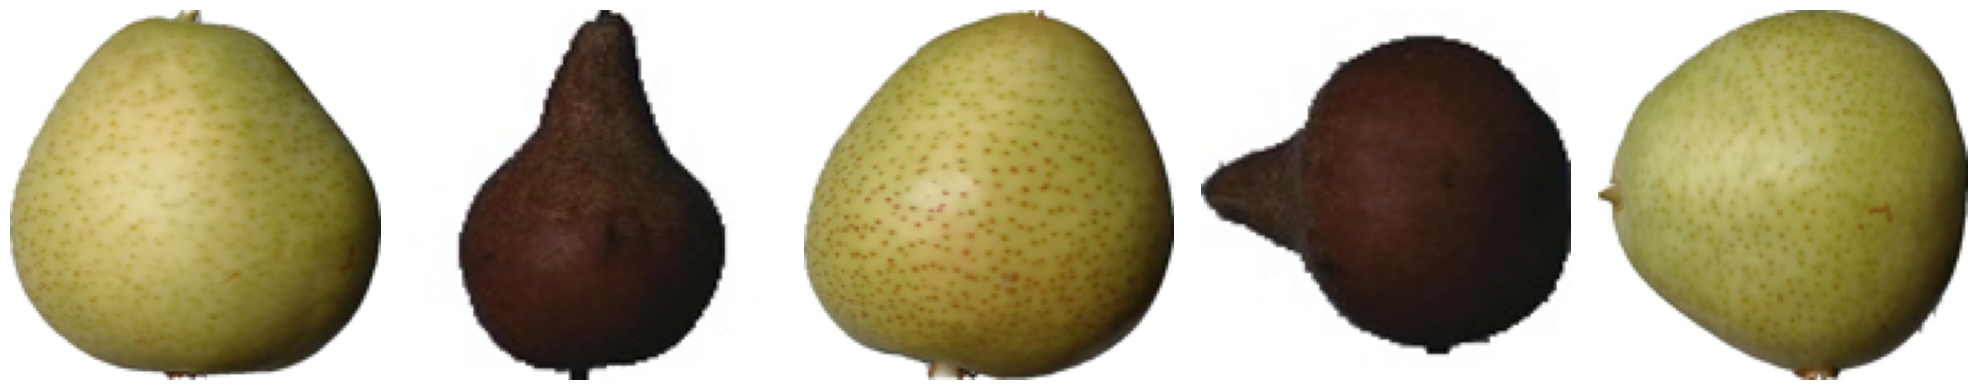

In [17]:
# plotting some yummy pears as well
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for i in range(5):
    # Display the image in the corresponding subplot
    axes[i].imshow(pears_data[i])
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
data = np.concatenate((apple_data, pears_data), axis=0)

## Task 5: Build classification model using CNN

In [19]:
# Importing the necessary packages for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [24]:
# Building the model with 2 Conv2D layers and 2 MaxPooling2D layers
model = Sequential()

# Adding the first convolutional layer
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [29]:
# separate the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, np.concatenate((np.ones(len(apple_data)), np.zeros(len(pears_data)))), test_size=0.2, random_state=42)

In [30]:
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train model in 5 epochs
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
12/12 [==============================] - 11s 753ms/step - loss: 2.3604 - accuracy: 0.9045 - val_loss: 1.6169 - val_accuracy: 0.8778
Epoch 2/5
12/12 [==============================] - 10s 807ms/step - loss: 0.4853 - accuracy: 0.9551 - val_loss: 0.8690 - val_accuracy: 0.8778
Epoch 3/5
12/12 [==============================] - 9s 736ms/step - loss: 0.1573 - accuracy: 0.9775 - val_loss: 0.4148 - val_accuracy: 0.9778
Epoch 4/5
12/12 [==============================] - 17s 2s/step - loss: 0.0575 - accuracy: 0.9944 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/5
12/12 [==============================] - 13s 1s/step - loss: 1.4042e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dense_1 (Dense)             (None, 30, 30, 128)       4224      
                                                                 
 flatten (Flatten)           (None, 115200)           

## Task 6: Visualize training and test accuracy over epochs

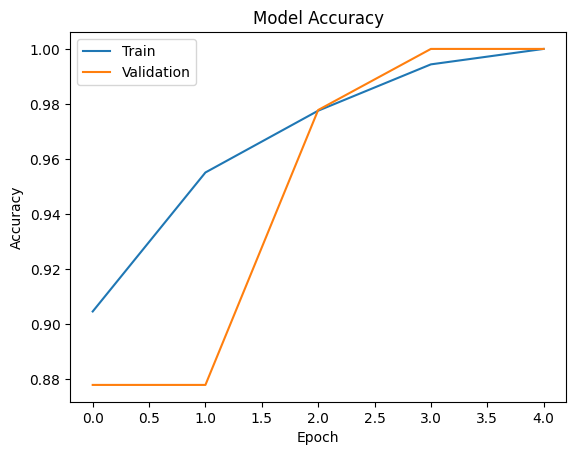

In [33]:
# visualizing accuracy and loss in training and validation data
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()